A test for [MDTraj](http://mdtraj.org/) about calculating interactions within 6 A.

In [1]:
import mdtraj as md
traj = md.load('./material/md.pdb')
top = traj.topology
print traj
print top

<mdtraj.Trajectory with 101 frames, 4018 atoms, 401 residues, and unitcells>
<mdtraj.Topology with 1 chains, 401 residues, 4018 atoms, 4088 bonds>


In [2]:
# traj.xyz[frame_idx, atom_idx,:]
traj.xyz[0,0]

array([ 2.63599992,  1.25999999,  9.58300018], dtype=float32)

In [3]:
cas = top.select('name CA')
print cas
len(cas)

[   4   12   22   35   44   65   73   82   90  108  126  131  138  146  154
  175  188  198  204  213  222  231  240  257  264  270  278  287  293  306
  312  330  339  348  358  366  380  391  399  420  426  435  449  455  462
  469  477  486  494  502  512  520  532  542  550  558  567  577  588  596
  605  615  629  646  657  666  687  700  711  722  731  739  749  761  770
  782  792  801  810  819  827  836  857  866  878  886  895  907  915  922
  930  943  952  960  968  977  984  992  997 1003 1008 1016 1023 1032 1041
 1049 1057 1066 1075 1087 1093 1099 1107 1120 1129 1137 1154 1163 1171 1179
 1187 1196 1210 1228 1235 1240 1248 1254 1259 1276 1282 1291 1300 1313 1320
 1331 1340 1353 1362 1379 1390 1395 1408 1412 1420 1427 1440 1451 1459 1467
 1476 1484 1496 1503 1512 1527 1532 1541 1557 1565 1573 1581 1589 1598 1610
 1619 1628 1637 1648 1653 1661 1670 1676 1686 1696 1706 1714 1722 1731 1748
 1756 1765 1776 1793 1802 1813 1824 1830 1843 1852 1861 1870 1878 1890 1899
 1912 1922 1

401

In [4]:
import numpy as np
cm = np.zeros((401,401))

In [5]:
for f in range(traj.n_frames):
    for i, cur_i in enumerate(cas):
        cur_ca = traj.xyz[f, cur_i]    
        for j, com_i in enumerate(cas):
            dis = np.sqrt(np.sum((traj.xyz[f,com_i]-cur_ca)**2))
            if dis < 6.0:
                cm[i][j] = cm[i][j] + 1


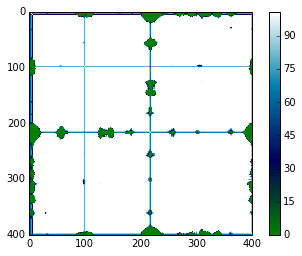

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

In [9]:
cm

array([[ 101.,   87.,   84., ...,   63.,   44.,   59.],
       [  87.,  101.,   72., ...,   75.,   50.,   63.],
       [  84.,   72.,  101., ...,   50.,   39.,   60.],
       ..., 
       [  63.,   75.,   50., ...,  101.,   76.,   73.],
       [  44.,   50.,   39., ...,   76.,  101.,   70.],
       [  59.,   63.,   60., ...,   73.,   70.,  101.]])